<center><img src="image-02.png" width="400"/></center>

# Decoding the Data Job Jungle
Comparing Data analyst, Data scientist and Business analyst roles using web-scraped data obtained from Diffbot and several NLP packages in Python. 

### Introduction

When I first decided to pursue a Master’s in the USA, people often asked about my career aspirations post-graduation. I would tell them, “I love data and crafting meaningful insights from it is my passion. To me, raw information is like a treasure trove waiting to tell a beautiful story.” However, I wasn’t always familiar with the right jargon to describe this work. Through my own research, I discovered a myriad of job titles with overlapping descriptions. The most confusing were the roles of Business Analyst, Data Scientist, and Data Analyst.

After diving into two semesters of my master’s program, I thought I would have a better grasp of these roles. Yet, each time I sat down to read job descriptions, the confusion crept back in. To demystify these roles, I’m comparing Data Analyst, Data Scientist, and Business Analyst positions using web-scraped data from Diffbot and leveraging several NLP packages in Python. 

Let’s explore the intriguing landscapes of Data Analysts, Data Scientists, and Business Analysts. Each role, like a distinct character in a grand narrative, has its own story to tell, and through this analysis, we will unveil the chapters that make each one unique.

### Choosing Dataset

Choosing an interesting dataset is like selecting the perfect ingredients for a recipe; it’s the foundation of a delicious dish. Rather than opting for pre-packaged, cleaned ingredients, I prefer to dive into the raw, unprocessed data from the website - Diffbot (https://app.diffbot.com/get-started/). 

Just as a chef finds joy in preparing and transforming raw ingredients into a masterpiece, data cleaning, preparation, and transformation are the heart and soul of any data analytics job. This approach is especially meaningful for me as a Master’s student on the job hunt, where working with real data provides invaluable experience.

### Pre-requisites

In [7]:
#!pip install yarl

In [8]:
#!pip install Cmake

In [9]:
#!pip install plotly_express

In [10]:
#!pip install -U gensim

In [11]:
#!pip install texthero

In [12]:
#!pip install scattertext

### Load libraries

In [14]:
import pandas as pd
from urllib.parse import urlparse

import plotly_express as px
from yarl import URL

import plotly.io as pio
pio.renderers.default = 'iframe' 

import texthero as hero
from texthero import preprocessing as p
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import scattertext as st
import nltk
import re
import string

### Loading the data

In [16]:
# Load the data from CSV files into DataFrames
data_analyst = pd.read_csv("data-analyst-jobs.csv")

business_analyst = pd.read_csv("business-analyst-jobs.csv")

data_scientist = pd.read_csv("data-scientist-jobs.csv")

In [17]:
# Add a column to each DataFrame indicating the job title
data_analyst["title"] = "Data Analyst"
business_analyst["title"] = "Business Analyst"
data_scientist["title"] = "Data Scientist"

# Concatenate the three DataFrames into one and reset the index
df_roles = pd.concat([data_analyst, business_analyst, data_scientist]).reset_index(drop=True)

In [18]:
# Display the first few rows of the combined DataFrame
df_roles

,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,company
0,http://diffbot.com/entity/JOB3307461575,en,JOB3307461575,1552312065,Genomics Data Analyst and Database Manager,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,Genomics Data Analyst and Database Manager\nMa...,NaN,Genomics Data Analyst and Database Manager\nMa...,Data Analyst,Job,NaN
1,http://diffbot.com/entity/JOB17660896611,en,JOB17660896611,1550846452,Data Analyst with Tableau Expertise,https://www.linkedin.com/jobs/view/805789826/,2+ years professional experience as a data ana...,NaN,"Job description\nNOTE: Currently, we are looki...",NaN,"Job description\nNOTE: Currently, we are looki...",Data Analyst,Job,NaN
2,http://diffbot.com/entity/JOB36339623293,en,JOB36339623293,1613889373,Data Analyst/Data Entry Analyst.,https://www.linkedin.com/jobs/data-analyst-job...,NaN,NaN,NaN,NaN,NaN,Data Analyst,Job,NaN
3,http://diffbot.com/entity/JOB38355557318,en,JOB38355557318,1580907361,Data Analyst / Bioinformatics Specialist,https://www.nature.com/naturecareers/job/data-...,NaN,NaN,000041\nData Analyst / Bioinformatics Speciali...,NaN,000041\nData Analyst / Bioinformatics Speciali...,Data Analyst,Job,NaN
4,http://diffbot.com/entity/JOB41116083536,en,JOB41116083536,1542432413,Data Analyst II,https://www.linkedin.com/jobs/view/655258760/,Bachelors degree (or country equivalent degree...,NaN,"Job Description\nData Analyst\nWayzata, MN\nHo...",Evaluate data for deviations from expected ass...,"Job Description\nData Analyst\nWayzata, MN\nHo...",Data Analyst,Job,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15977,http://diffbot.com/entity/JOB17761141770,en,JOB17761141770,1608023179,"Senior Data Scientist, Online in Atlanta, Georgia",https://militaryjobs.homedepot.com/atlanta-ga/...,NaN,NaN,\nJob Information\nPOSITION PURPOSE\nA Senior ...,NaN,\nJob Information\nPOSITION PURPOSE\nA Senior ...,Data Scientist,Job,NaN
15978,http://diffbot.com/entity/JOB17857447545,en,JOB17857447545,1490166113,Senior Data Scientist (m/f),https://jobs.teamviewer.com/en/job/senior-data...,"A Bachelor or MSc degree in Mathematics, Stati...",NaN,« Back to job search\nfor Business Intelligen...,"Develop, apply and maintain machine learning, ...",« Back to job search\nfor Business Intelligen...,Data Scientist,Job,NaN
15979,http://diffbot.com/entity/JOB17904956309,en,JOB17904956309,1553389539,Data Scientist (KTP Associate),https://www.jobs.manchester.ac.uk/displayjob.a...,NaN,NaN,\nThis is an exciting opportunity for an ambit...,NaN,\nThis is an exciting opportunity for an ambit...,Data Scientist,Job,NaN
15980,http://diffbot.com/entity/JOB18227069952,en,JOB18227069952,1581962061,Data Scientist Jobs in Texas,https://militaryjobs.homedepot.com/data-scient...,NaN,NaN,\nThe Home Depot is committed to being an equa...,The specific accommodation requested to comple...,\nThe Home Depot is committed to being an equa...,Data Scientist,Job,NaN


In [19]:
# Remove rows where the 'text' column has NaN values
df_roles = df_roles[~df_roles.text.isna()]

# Display the cleaned DataFrame
df_roles

,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,company
0,http://diffbot.com/entity/JOB3307461575,en,JOB3307461575,1552312065,Genomics Data Analyst and Database Manager,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,Genomics Data Analyst and Database Manager\nMa...,NaN,Genomics Data Analyst and Database Manager\nMa...,Data Analyst,Job,NaN
1,http://diffbot.com/entity/JOB17660896611,en,JOB17660896611,1550846452,Data Analyst with Tableau Expertise,https://www.linkedin.com/jobs/view/805789826/,2+ years professional experience as a data ana...,NaN,"Job description\nNOTE: Currently, we are looki...",NaN,"Job description\nNOTE: Currently, we are looki...",Data Analyst,Job,NaN
3,http://diffbot.com/entity/JOB38355557318,en,JOB38355557318,1580907361,Data Analyst / Bioinformatics Specialist,https://www.nature.com/naturecareers/job/data-...,NaN,NaN,000041\nData Analyst / Bioinformatics Speciali...,NaN,000041\nData Analyst / Bioinformatics Speciali...,Data Analyst,Job,NaN
4,http://diffbot.com/entity/JOB41116083536,en,JOB41116083536,1542432413,Data Analyst II,https://www.linkedin.com/jobs/view/655258760/,Bachelors degree (or country equivalent degree...,NaN,"Job Description\nData Analyst\nWayzata, MN\nHo...",Evaluate data for deviations from expected ass...,"Job Description\nData Analyst\nWayzata, MN\nHo...",Data Analyst,Job,NaN
5,http://diffbot.com/entity/JOB41701926252,en,JOB41701926252,1550846460,Senior Data Analyst - Product and User Insights,https://www.linkedin.com/jobs/view/878065793/,Partner with product team member to use analyt...,NaN,Job description\nDo you “love” data? Are you a...,"You are a SQL pro,You can perform advanced dat...",Job description\nDo you “love” data? Are you a...,Data Analyst,Job,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15977,http://diffbot.com/entity/JOB17761141770,en,JOB17761141770,1608023179,"Senior Data Scientist, Online in Atlanta, Georgia",https://militaryjobs.homedepot.com/atlanta-ga/...,NaN,NaN,\nJob Information\nPOSITION PURPOSE\nA Senior ...,NaN,\nJob Information\nPOSITION PURPOSE\nA Senior ...,Data Scientist,Job,NaN
15978,http://diffbot.com/entity/JOB17857447545,en,JOB17857447545,1490166113,Senior Data Scientist (m/f),https://jobs.teamviewer.com/en/job/senior-data...,"A Bachelor or MSc degree in Mathematics, Stati...",NaN,« Back to job search\nfor Business Intelligen...,"Develop, apply and maintain machine learning, ...",« Back to job search\nfor Business Intelligen...,Data Scientist,Job,NaN
15979,http://diffbot.com/entity/JOB17904956309,en,JOB17904956309,1553389539,Data Scientist (KTP Associate),https://www.jobs.manchester.ac.uk/displayjob.a...,NaN,NaN,\nThis is an exciting opportunity for an ambit...,NaN,\nThis is an exciting opportunity for an ambit...,Data Scientist,Job,NaN
15980,http://diffbot.com/entity/JOB18227069952,en,JOB18227069952,1581962061,Data Scientist Jobs in Texas,https://militaryjobs.homedepot.com/data-scient...,NaN,NaN,\nThe Home Depot is committed to being an equa...,The specific accommodation requested to comple...,\nThe Home Depot is committed to being an equa...,Data Scientist,Job,NaN


In [96]:
# Define the function to extract the host from a URL
def get_page_source(url: str):
    return urlparse(url).netloc

# Apply the get_page_source function to the 'pageUrl' column to create a new 'page_host' column
df_roles.loc[:, "page_host"] = df_roles["pageUrl"].apply(get_page_source)

# Display the updated DataFrame with the new 'page_host' column
df_roles

,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,company,page_host
0,http://diffbot.com/entity/JOB3307461575,en,JOB3307461575,1552312065,Genomics Data Analyst and Database Manager,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,Genomics Data Analyst and Database Manager\nMa...,NaN,Genomics Data Analyst and Database Manager\nMa...,Data Analyst,Job,NaN,www.nature.com
1,http://diffbot.com/entity/JOB17660896611,en,JOB17660896611,1550846452,Data Analyst with Tableau Expertise,https://www.linkedin.com/jobs/view/805789826/,2+ years professional experience as a data ana...,NaN,"Job description\nNOTE: Currently, we are looki...",NaN,"Job description\nNOTE: Currently, we are looki...",Data Analyst,Job,NaN,www.linkedin.com
3,http://diffbot.com/entity/JOB38355557318,en,JOB38355557318,1580907361,Data Analyst / Bioinformatics Specialist,https://www.nature.com/naturecareers/job/data-...,NaN,NaN,000041\nData Analyst / Bioinformatics Speciali...,NaN,000041\nData Analyst / Bioinformatics Speciali...,Data Analyst,Job,NaN,www.nature.com
4,http://diffbot.com/entity/JOB41116083536,en,JOB41116083536,1542432413,Data Analyst II,https://www.linkedin.com/jobs/view/655258760/,Bachelors degree (or country equivalent degree...,NaN,"Job Description\nData Analyst\nWayzata, MN\nHo...",Evaluate data for deviations from expected ass...,"Job Description\nData Analyst\nWayzata, MN\nHo...",Data Analyst,Job,NaN,www.linkedin.com
5,http://diffbot.com/entity/JOB41701926252,en,JOB41701926252,1550846460,Senior Data Analyst - Product and User Insights,https://www.linkedin.com/jobs/view/878065793/,Partner with product team member to use analyt...,NaN,Job description\nDo you “love” data? Are you a...,"You are a SQL pro,You can perform advanced dat...",Job description\nDo you “love” data? Are you a...,Data Analyst,Job,NaN,www.linkedin.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15977,http://diffbot.com/entity/JOB17761141770,en,JOB17761141770,1608023179,"Senior Data Scientist, Online in Atlanta, Georgia",https://militaryjobs.homedepot.com/atlanta-ga/...,NaN,NaN,\nJob Information\nPOSITION PURPOSE\nA Senior ...,NaN,\nJob Information\nPOSITION PURPOSE\nA Senior ...,Data Scientist,Job,NaN,militaryjobs.homedepot.com
15978,http://diffbot.com/entity/JOB17857447545,en,JOB17857447545,1490166113,Senior Data Scientist (m/f),https://jobs.teamviewer.com/en/job/senior-data...,"A Bachelor or MSc degree in Mathematics, Stati...",NaN,« Back to job search\nfor Business Intelligen...,"Develop, apply and maintain machine learning, ...",« Back to job search\nfor Business Intelligen...,Data Scientist,Job,NaN,jobs.teamviewer.com
15979,http://diffbot.com/entity/JOB17904956309,en,JOB17904956309,1553389539,Data Scientist (KTP Associate),https://www.jobs.manchester.ac.uk/displayjob.a...,NaN,NaN,\nThis is an exciting opportunity for an ambit...,NaN,\nThis is an exciting opportunity for an ambit...,Data Scientist,Job,NaN,www.jobs.manchester.ac.uk
15980,http://diffbot.com/entity/JOB18227069952,en,JOB18227069952,1581962061,Data Scientist Jobs in Texas,https://militaryjobs.homedepot.com/data-scient...,NaN,NaN,\nThe Home Depot is committed to being an equa...,The specific accommodation requested to comple...,\nThe Home Depot is committed to being an equa...,Data Scientist,Job,NaN,militaryjobs.homedepot.com


### Analyzing the data

The objective of this analysis is to identify the top websites hosting job postings for the positions of `Data Analyst`, `Business Analyst`, and `Data Scientist`. By analyzing the frequency of job postings from different hosts, we can gain insights into the most popular job boards or company websites for these roles.


In [22]:
# Get the top 20 page hosts by frequency
top_pages = df_roles["page_host"].value_counts().nlargest(20).reset_index()
top_pages.columns = ['page_host', 'count']

# Plotting the horizontal bar chart 
fig = px.bar(
    top_pages,
    y='page_host',
    x='count',
    labels={"count": "Frequency", "page_host": "Page Host"},
    title="Top 20 Page Hosts by Frequency",
    orientation='h',
    color='count',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(
    title={
        'text': "Top 20 Page Hosts by Frequency",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial Black', 'color': 'darkblue'}
    },
    xaxis_title="Frequency",
    yaxis_title="Page Host",
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    xaxis=dict(
        title_font=dict(size=18),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title_font=dict(size=18),
        tickfont=dict(size=12),
        categoryorder="total ascending"
    )
)

fig.update_traces(
    marker=dict(line=dict(color='black', width=1.5)),
    hovertemplate="<b>Page Host:</b> %{y}<br><b>Frequency:</b> %{x}<extra></extra>"
)

annotations = [
    dict(
        y=row['page_host'],
        x=row['count'],
        text=row['count'],
        xanchor='left',
        yanchor='middle',
        showarrow=False,
        font=dict(size=12, color='black')
    ) for _, row in top_pages.iterrows()
]

fig.update_layout(annotations=annotations)

fig.show()

In [23]:
# Get the top 20 page hosts by frequency for 'data analyst' title
top_pages = df_roles[df_roles['title'] == 'Data Analyst']["page_host"].value_counts().nlargest(20).reset_index()
top_pages.columns = ['page_host', 'count']

# Plotting the histogram
fig = px.histogram(
    top_pages,
    x='page_host',
    y='count',
    labels={"count": "Frequency", "page_host": "Page Host - Data Analyst"},
).update_xaxes(
    categoryorder="total descending",
)

fig.show()

In [24]:
# Get the top 20 page hosts by frequency for 'business analyst' title
top_pages = df_roles[df_roles['title'] == 'Business Analyst']["page_host"].value_counts().nlargest(20).reset_index()
top_pages.columns = ['page_host', 'count']

# Plotting the histogram
fig = px.histogram(
    top_pages,
    x='page_host',
    y='count',
    labels={"count": "Frequency", "page_host": "Page Host - Business Analyst"},
).update_xaxes(
    categoryorder="total descending",
)

fig.show()

In [25]:
# Get the top 20 page hosts by frequency for 'data scientist' title
top_pages = df_roles[df_roles['title'] == 'Data Scientist']["page_host"].value_counts().nlargest(20).reset_index()
top_pages.columns = ['page_host', 'count']

# Plotting the histogram
fig = px.histogram(
    top_pages,
    x='page_host',
    y='count',
    labels={"count": "Frequency", "page_host": "Page Host - Data Scientist"},
).update_xaxes(
    categoryorder="total descending",
)

fig.show()

### Inference

#### Data Analyst and Business Analyst Roles

For both Data Analyst and Business Analyst roles, the page host `militaryjobs.homedepot.com` has a dominant presence, while `indeed.com` does not appear in the top 20. This suggests several important points:

1. **Targeted Audience**:
   - `militaryjobs.homedepot.com` likely targets a specific audience, such as military veterans or transitioning service members. Companies might be posting jobs here to attract candidates with military experience due to their unique skills and work ethic.

2. **Niche Market Focus**:
   - Job boards focusing on niche markets, such as veterans, may have a higher posting rate for specific job types (e.g., Business Analyst or Data Analyst) because employers know they are reaching a targeted and relevant audience.


#### Data Scientist Role

For Data Scientist roles, the page host `indeed.com` has the highest number of postings compared to `militaryjobs.homedepot.com`. This can be attributed to several factors:

1. **Post-Pandemic Demand Surge**:
   - The demand for Data Scientists has surged significantly after the COVID-19 pandemic. Companies across various sectors are increasingly seeking data-driven insights to navigate the new normal, leading to a higher number of job postings for Data Scientist roles.

2. **Popularity Among Fresh Graduates**:
   - The Data Scientist role has gained popularity among fresh graduates due to its perceived attractiveness and growth potential. Many graduates and professionals looking to transition into this field use general job boards like `indeed.com` to find opportunities.

3. **Broader Reach**:
   - `indeed.com` serves a broader audience compared to niche job boards. As a result, it is a preferred platform for both job seekers and employers for roles that attract a wider candidate pool, such as Data Scientists.


The analysis highlights the importance of targeted job boards for specific roles and audiences:

- **For Employers**: Utilizing niche job boards like `militaryjobs.homedepot.com` can be highly effective for attracting candidates with specific backgrounds, such as military veterans, especially for roles like Data Analyst and Business Analyst.
- **For Job Seekers**: Understanding where companies post job openings for specific roles can help job seekers target their applications more effectively. For Data Scientist roles, platforms like `indeed.com` offer a broader range of opportunities, reflecting the high demand and wide appeal of this role in the current job market.


### Analyze text - Wordcloud

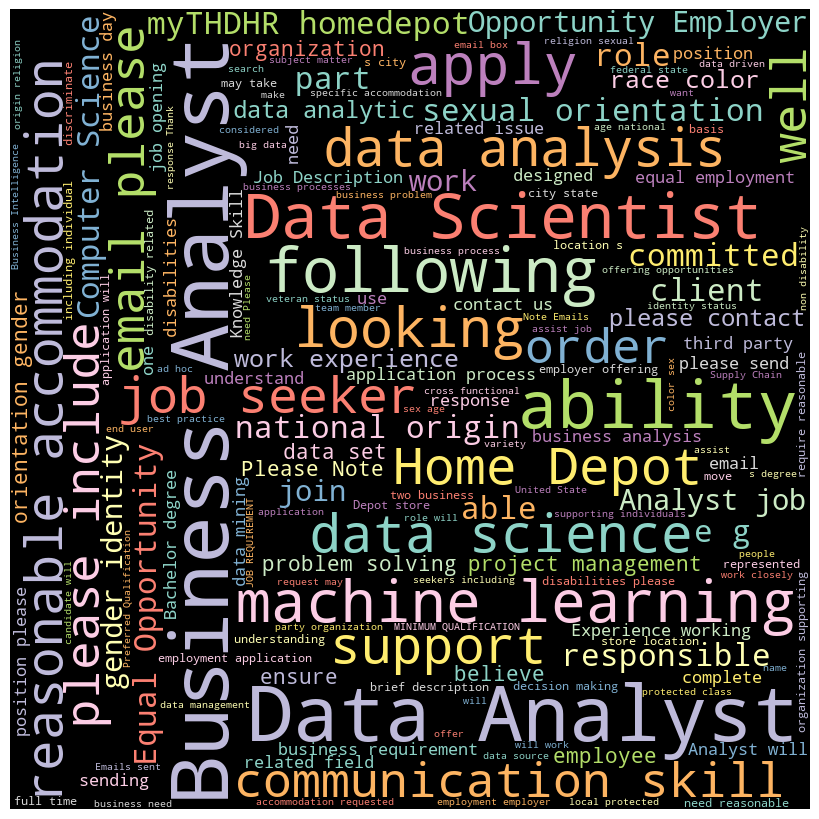

In [28]:
# Turn a list of text into a string
text = " ".join(df_roles["text"].values)

def make_wordcloud(new_text):
    """'function to make wordcloud"""

    wordcloud = WordCloud(
        width=800,
        height=800,
        min_font_size=10,
        background_color="black",
        colormap="Set3",
        collocation_threshold=3,
    ).generate(new_text)

    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

    return fig

text_cloud = make_wordcloud(text)

## Analyze job requirements

In [30]:
def get_corpus(df_roles, category_col="title"):
    corpus = (
        st.CorpusFromParsedDocuments(df_roles, category_col="title", parsed_col="parse")
        .build()
        .get_unigram_corpus()
        .compact(st.AssociationCompactor(2000))
    )
    return corpus
    
def get_html_comparison(corpus, category, category_name, not_category_name):
    html = st.produce_scattertext_explorer(
        corpus,
        category=category,
        category_name=category_name,
        not_category_name=not_category_name,
        minimum_term_frequency=5,
        pmi_threshold_coefficient=0,
        width_in_pixels=1000,
        metadata=corpus.get_df()["page_host"],
        transform=st.Scalers.dense_rank,
    )
    return html

In [31]:
analyze_col = "requirements"

# Filter out the rows whose requirement is nan
filtered_df = df_roles[~df_roles[analyze_col].isna()][["title", analyze_col, "page_host"]]

# Tokenize text
filtered_df["parse"] = filtered_df[analyze_col].apply(st.whitespace_nlp_with_sentences)

In [32]:
corpus = get_corpus(filtered_df)

In [33]:
#nltk.download("averaged_perceptron_tagger")

# get DataFrame with terms and their frequency
term_freq_df = corpus.get_term_freq_df()

# Get scaled F-scores of each term in each category
term_freq_df["Data Scientist Score"] = corpus.get_scaled_f_scores("Data Scientist")
term_freq_df["Data Analyst Score"] = corpus.get_scaled_f_scores("Data Analyst")
term_freq_df["Business Analyst Score"] = corpus.get_scaled_f_scores("Business Analyst")

# Remove terms that are not nouns
def is_noun(word: str):
    pos = nltk.pos_tag([word])[0][1]
    return pos[:2] == "NN"

term_freq_df = term_freq_df.loc[map(is_noun, term_freq_df.index)]

#### Frequent job requirements - Data scientists

In [35]:
term_freq_df.sort_values(by="Data Scientist Score", ascending=False).index[:30]

Index(['machine', 'python', 'science', 'statistics', 'r', 'computer',
       'techniques', 'field', 'mathematics', 'quantitative', 'analytics',
       'data', 'engineering', 'etc', 'research', 'languages', 'algorithms',
       'experience', 'hadoop', 'models', 'spark', 'mining', 'e', 'g', 'tools',
       'deep', 'phd', 'master', 'scale', 'java'],
      dtype='object', name='term')

#### Frequent job requirements - Data analyst

In [37]:
term_freq_df.sort_values(by="Data Analyst Score", ascending=False).index[:30]

Index(['excel', 'sql', 'data', 'skills', 'tools', 'ability', 'years', 'work',
       'reporting', 'tableau', 'etc', 'degree', 'knowledge', 's', 'database',
       'information', 'reports', 'e', 'systems', 'analytics', 'excellent',
       'use', 'microsoft', 'bachelor', 'g', 'issues', 'ms', 'relevant', 'sas',
       'access'],
      dtype='object', name='term')

#### Frequent job requirements - Business analyst

In [39]:
term_freq_df.sort_values(by="Business Analyst Score", ascending=False).index[:50]

Index(['requirements', 'project', 'business', 'management', 'process',
       'skills', 'analyst', 'development', 'ability', 'processes', 'knowledge',
       'work', 'communication', 'analysis', 'information', 'user', 'projects',
       'team', 'experience', 'systems', 'solutions', 'degree', 'stakeholders',
       's', 'teams', 'environment', 'multiple', 'system', 'support',
       'excellent', 'level', 'software', 'proven', 'design', 'customer',
       'delivery', 'documentation', 'test', 'problem', 'bachelor',
       'technology', 'client', 'needs', 'solution', 'microsoft', 'deadlines',
       'agile', 'manage', 'office', 'lead'],
      dtype='object', name='term')

The frequent job requirements for `Data Scientists`, `Data Analysts`, and `Business Analysts` highlight the key skills and qualifications commonly sought in these roles. 

### Data Scientist
1. **Technical Skills**: 
   - Programming languages: Python, R, Java
   - Big data technologies: Hadoop, Spark
   - Machine learning and deep learning: algorithms, models, mining, techniques
2. **Foundational Knowledge**: 
   - Mathematics, statistics, quantitative fields

### Data Analyst
1. **Technical Skills**: 
   - Data manipulation: Excel, SQL
   - Data visualization: Tableau
   - Statistical tools: SAS
2. **Reporting and Analysis**: 
   - Creating and interpreting reports
   - Strong analytical skills

### Business Analyst
1. **Project and Process Management**: 
   - Project management: projects, delivery, deadlines
   - Business processes: process, processes, solution, design
2. **Communication and Teamwork**: 
   - Communication skills: user, team, stakeholders, client
   - Ability to work in teams and manage multiple tasks
3. **Technical and Analytical Skills**: 
   - Technical knowledge: systems, software, technology
   - Analytical skills: analysis, problem-solving

### Inferences

1. **Overlap in Skills**: While each role has distinct technical requirements, there is a significant overlap in certain skills. For instance, all roles value analytical skills, proficiency in relevant tools, and problem-solving abilities.

2. **Role-specific Expertise**: 
   - Data Scientists require a strong foundation in programming, machine learning, and big data technologies, often with advanced degrees.
   - Data Analysts focus more on data manipulation, reporting, and visualization skills, with an emphasis on tools like Excel and SQL.
   - Business Analysts prioritize project management, business process understanding, and communication skills, with less emphasis on technical programming skills.

3. **Educational Requirements**: All roles typically require a minimum of a bachelor's degree, but Data Scientists often need advanced degrees due to the complex nature of the work.

4. **Experience**: Relevant work experience is crucial across all roles, with specific industries and fields of expertise being more relevant for Data Scientists and Business Analysts.

#### Job requirement - Data analyst vs. Data scientist

In [42]:
corpus = get_corpus(filtered_df[filtered_df['title'].isin(["Data Analyst", "Data Scientist"]) ])
html = get_html_comparison(corpus = corpus, category = "Data Analyst", category_name = "Data Analyst", not_category_name = "Data Scientist")
open("data_analyst_vs_data_scientist_requirements_terms.html", "w", encoding="utf-8").write(html)

3298939

#### Job requirement - Data analyst vs. Business analyst

In [44]:
corpus = get_corpus(filtered_df[filtered_df['title'].isin(["Data Analyst", "Business Analyst"]) ])
html = get_html_comparison(corpus = corpus, category = "Data Analyst", category_name = "Data Analyst", not_category_name = "Business Analyst")
open("data_analyst_vs_business_analyst_requirements_terms.html", "w", encoding="utf-8").write(html)

3317220

**Comparing Data Scientist Roles to Data Analyst Roles**

The scatter plot compares key terms associated with Data Scientist and Data Analyst job roles. The more blue the dot, the more it is associated with the title Data Analyst, and the more red the dot, the more it is associated with the title Data Scientist. Terms in the upper left corner are high in Data Analyst frequency and low in Data Scientist frequency, whereas terms in the bottom right corner are high in Data Scientist frequency and low in Data Analyst frequency. 

Characteristic terms define the specific requirements for each role. For Data Scientists, the focus is heavily on math, statistics, predictive algorithms, machine learning, optimization, and big data languages such as Hadoop, Spark, and Scala. Data Scientist positions often require a master's or PhD degree. In contrast, Data Analyst roles emphasize BI tools, Excel, Microsoft Office, reporting, and data visualization.

**Comparing Business Analyst Roles to Data Analyst Roles**

When comparing Business Analyst requirements to Data Analyst requirements, Data Analyst roles are notably more technical. Terms distinguishing Data Analyst jobs include R, Python, SAS, programming, database mining, and data visualization. For Business Analysts, the terms are more qualitative and client-facing, such as solution, delivery, stakeholders, processes, and clients.

**Summary**

Data Analyst roles occupy a middle ground in terms of technical skills when compared to Data Scientist and Business Analyst roles. Data Analysts focus on reporting and data visualization, requiring knowledge of programming languages like R and Python, as well as proficiency with databases and office tools like Excel and data visualization tools such as Tableau and Power BI. Data Scientist roles demand a higher technical acumen, often specifying the need for advanced degrees and expertise in computer science. On the other hand, Business Analyst roles are less technical and more oriented towards client interaction and process management.

By using a search feature, one can look up specific keywords within job postings to further explore the requirements for these roles. 

In conclusion, while Data Analyst roles are more technical compared to Business Analyst roles, they are less so than Data Scientist roles, which require a deeper understanding of advanced analytical techniques and technologies.

## Analyzing Tasks

In [47]:
analyze_col = "tasks"

# Filter out the rows whose requirement is nan
filtered_df = df_roles[~df_roles[analyze_col].isna()][["title", analyze_col, "page_host"]]

# Tokenize text
filtered_df["parse"] = filtered_df[analyze_col].apply(st.whitespace_nlp_with_sentences)

In [48]:
corpus = get_corpus(filtered_df)

In [49]:
# get DataFrame with terms and their frequency
term_freq_df = corpus.get_term_freq_df()

# Get scaled F-scores of each term in each category
term_freq_df["Data Scientist Score"] = corpus.get_scaled_f_scores("Data Scientist")
term_freq_df["Data Analyst Score"] = corpus.get_scaled_f_scores("Data Analyst")
term_freq_df["Business Analyst Score"] = corpus.get_scaled_f_scores("Business Analyst")
term_freq_df = term_freq_df.loc[map(is_noun, term_freq_df.index)]

#### Frequent tasks - Data scientists

In [51]:
term_freq_df.sort_values(by="Data Scientist Score", ascending=False).index[:30]

Index(['machine', 'models', 'science', 'algorithms', 'techniques', 'analytics',
       'problems', 'data', 'python', 'research', 'solutions', 'r',
       'statistics', 'design', 'engineering', 'product', 'build', 'methods',
       'tools', 'predictive', 'insights', 's', 'computer', 'results', 'etc',
       'model', 'implement', 'optimization', 'e', 'g'],
      dtype='object', name='term')

#### Frequent tasks - Data analyst

In [53]:
term_freq_df.sort_values(by="Data Analyst Score", ascending=False).index[:30]

Index(['data', 'reports', 'reporting', 'analysis', 'skills', 'analytics',
       'tools', 'sql', 'experience', 'work', 'ability', 'support', 'quality',
       'excel', 'information', 'performance', 'database', 's', 'insights',
       'results', 'communication', 'etc', 'degree', 'dashboards', 'excellent',
       'sources', 'research', 'metrics', 'sets', 'maintain'],
      dtype='object', name='term')

#### Frequent tasks - Business analyst

In [55]:
term_freq_df.sort_values(by="Business Analyst Score", ascending=False).index[:30]

Index(['requirements', 'business', 'project', 'analyst', 'process',
       'management', 'processes', 'support', 'development', 'system',
       'knowledge', 'application', 'provide', 'analysis', 'skills', 'user',
       'ability', 'experience', 'systems', 'solutions', 'work', 'team',
       'stakeholders', 'teams', 'technology', 'training', 'employment',
       'accommodation', 'information', 'projects'],
      dtype='object', name='term')

#### Tasks - Data analyst vs. Data scientist

In [57]:
corpus = get_corpus(filtered_df[filtered_df['title'].isin(["Data Analyst", "Data Scientist"]) ])
html = get_html_comparison(corpus = corpus, category = "Data Analyst", category_name = "Data Analyst", not_category_name = "Data Scientist")
open("data_analyst_vs_data_scientist_tasks.html", "w", encoding="utf-8").write(html)

5761544

#### Tasks - Data analyst vs. Business analyst

In [59]:
corpus = get_corpus(filtered_df[filtered_df['title'].isin(["Data Analyst", "Business Analyst"]) ])
html = get_html_comparison(corpus = corpus, category = "Data Analyst", category_name = "Data Analyst", not_category_name = "Business Analyst")
open("data_analyst_vs_business_analyst_tasks.html", "w", encoding="utf-8").write(html)

6503093

**Comparison Task Analysis**

**Data Analyst vs. Data Scientist**

The comparison between Data Analyst and Data Scientist roles reveals:

- Data Scientists are more focused on advanced analytical techniques, machine learning, statistical models, and research-oriented tasks.
- Data Analysts are more involved in reporting, data manipulation, and ensuring data quality using tools like SQL and Excel. They focus on practical data analysis and visualization.

**Data Analyst vs. Business Analyst**

The comparison between Data Analyst and Business Analyst roles shows:

- Data Analysts are more technical, with a strong emphasis on data manipulation, programming, and creating dashboards.
- Business Analysts focus more on business processes, project management, and working with stakeholders to gather requirements and provide business solutions.

**Conclusion**

- Data Scientists require strong technical skills in machine learning, statistical analysis, and programming, often needing advanced degrees.
- Data Analysts balance technical skills with practical data analysis, reporting, and visualization, making their roles less research-oriented but more implementation-focused.
- Business Analysts emphasize business process management, stakeholder interaction, and project management, requiring a blend of business acumen and analytical skills.

### Summary
I imagined myself as a detective, piecing together clues from vast amounts of data, seeking to uncover hidden patterns and insights. In this grand investigation, I saw three distinct roles each with their own unique approaches and tools.

**The Data Analyst: The Meticulous Archivist**

The Data Analyst, in my mind, was akin to a meticulous archivist. This role involves diving deep into vast datasets, meticulously organizing and analyzing information. Equipped with tools like Excel and SQL, the Data Analyst sifts through mountains of data, performing detailed analyses to extract meaningful insights. Their tasks include generating reports, maintaining databases, and ensuring data quality. The Data Analyst crafts comprehensive visualizations that make complex data accessible and understandable, often using BI tools like Tableau and Power BI. They are the custodians of data, ensuring its accuracy and reliability, and their work often provides the foundational evidence needed for strategic decision-making.

**The Data Scientist: The Modern-Day Alchemist**

The Data Scientist appeared as a modern-day alchemist, transforming raw data into valuable insights through the power of advanced analytics and machine learning. Surrounded by complex algorithms and predictive models, the Data Scientist wields tools like Python, R, TensorFlow, and big data technologies such as Hadoop and Spark. Their work involves developing sophisticated models to predict future trends, optimizing processes through statistical techniques, and uncovering hidden patterns that can drive business innovation. The Data Scientist’s work often requires advanced degrees and a deep understanding of mathematics, statistics, and computer science. They are the innovators, pushing the boundaries of what is possible with data, turning abstract concepts into actionable strategies.

**The Business Analyst: The Strategic Advisor**

The Business Analyst, on the other hand, seemed like a strategic advisor, using data insights to craft compelling stories that drive business decisions. This role focuses on understanding business processes, gathering requirements, and communicating with stakeholders to deliver solutions that align with business goals. Armed with tools like PowerPoint and business intelligence software, the Business Analyst translates data into actionable insights, bridging the gap between technical teams and business stakeholders. They are adept at process management, project coordination, and stakeholder communication. The Business Analyst’s work is less about deep technical skills and more about applying business acumen to solve problems and improve processes. They are the strategists, ensuring that data-driven insights lead to meaningful business outcomes.